# Pymaceuticals Inc.
---

### Analysis

Out of nine treatments and one placebo, four treatments look promising enough to warrant further study. Those treatments are Capomulin, Ceftamin, Infubinol, and Ramicane. Infubinol warrants further study in particular, as the only outlying data point was present during the Infubinol trial. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_results_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_results_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice. (should be 249)
unique_mouse_id = study_results_complete['Mouse ID'].unique()
number_of_mice = len(unique_mouse_id)

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_ID = study_results_complete.loc[study_results_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_results_complete.loc[study_results_complete['Mouse ID'] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_results_clean = study_results_complete[study_results_complete["Mouse ID"]!="g989"]

In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mouse_id_clean = study_results_clean['Mouse ID'].unique()
number_of_mice_clean = len(unique_mouse_id_clean)
number_of_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = study_results_clean['Tumor Volume (mm3)'].groupby(study_results_clean['Drug Regimen']).mean()
median = study_results_clean['Tumor Volume (mm3)'].groupby(study_results_clean['Drug Regimen']).median()
variance = study_results_clean['Tumor Volume (mm3)'].groupby(study_results_clean['Drug Regimen']).var()
std_dev = study_results_clean['Tumor Volume (mm3)'].groupby(study_results_clean['Drug Regimen']).std()
sem = study_results_clean['Tumor Volume (mm3)'].groupby(study_results_clean['Drug Regimen']).sem()

summary_stats = pd.DataFrame({
    'Mean Tumor Volume' : mean,
    'Median Tumor Volume' : median,
    'Tumor Volume Variance' : variance,
    'Tumor Volume Std. Dev.' : std_dev,
    'Tumor Volume Std. Err.' : sem})
summary_stats
    

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

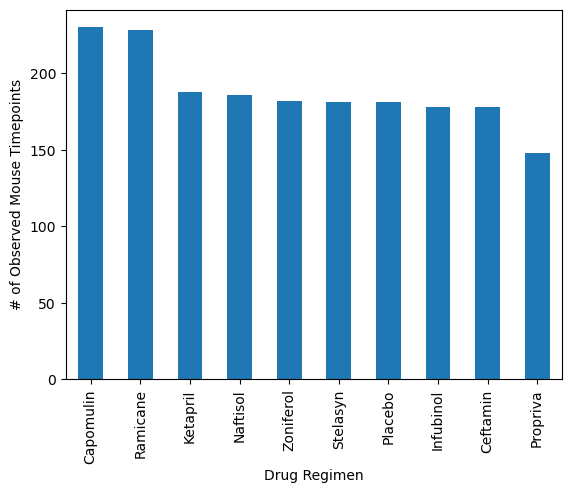

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count = study_results_clean["Drug Regimen"].value_counts()
mouse_count.plot.bar(xlabel = 'Drug Regimen', ylabel='# of Observed Mouse Timepoints')


Text(0, 0.5, '# of Observed Mouse Timepoints')

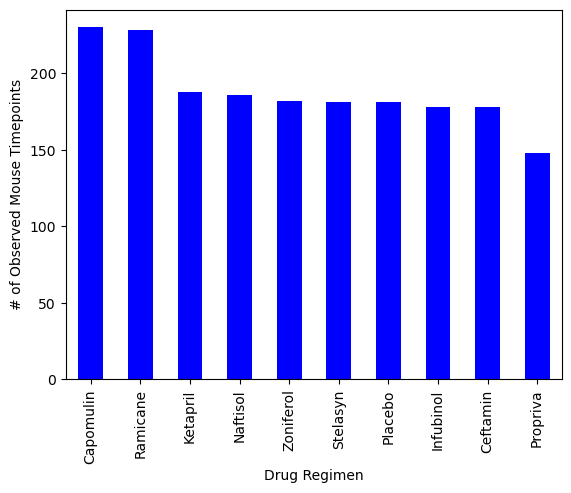

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plot_pandas = mouse_count.plot.bar(color='b')  
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

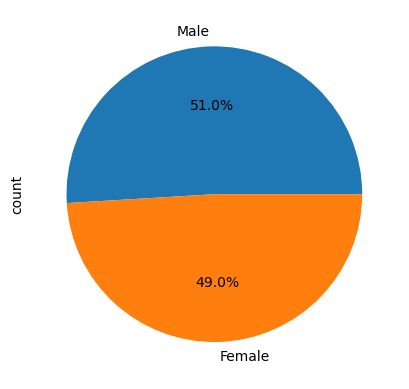

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = study_results_clean['Sex'].value_counts()
sex_df.plot.pie(autopct= "%1.1f%%")
plt.show()

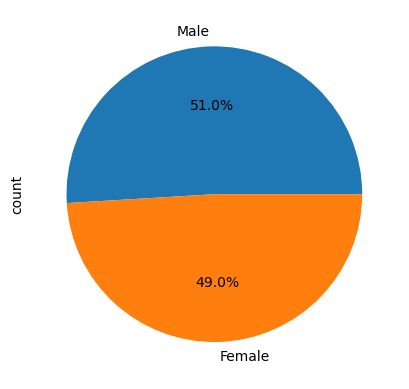

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male', 'Female'
sizes = [51,49]
plot = sex_df.plot.pie(y='Sex', autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = study_results_clean.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max()
max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df = pd.merge(max_timepoint, study_results_clean, how="left", on=["Mouse ID", "Timepoint"])
max_timepoint_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...
243,q633,45,70.827796,2,Zoniferol,Male,12,25
244,s337,45,62.109651,4,Zoniferol,Male,14,27
245,w140,5,47.717952,0,Zoniferol,Female,19,30
246,w575,45,68.401286,3,Zoniferol,Female,16,28


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = max_timepoint_df.loc[max_timepoint_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset 

    tumor_volume_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
            | (final_tumor_vol > upper_bound)]

    # Print out the result
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print(f"Number of outliers for Capomulin is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')
    print('----------------------------------------------------------')
    

Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Ceftamin Regimen
Final tumor volume(mm3) for Ceftamin below 25.36 could be outliers.
Final tumor volume(mm3) for Ceftamin above 87.67 could be outliers.
Average tumor volume(mm3) for Ceftamin is: 57.75
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol above 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Capomulin is: 1
Outlier final tumor volume(mm3) is 36.32
----------------------------------------------------------
Ramicane Regimen
Final tumor volume(mm3) for Ramican

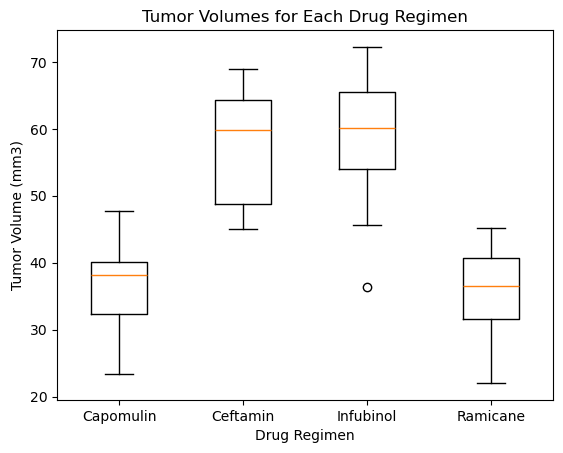

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels = treatments)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volumes for Each Drug Regimen')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

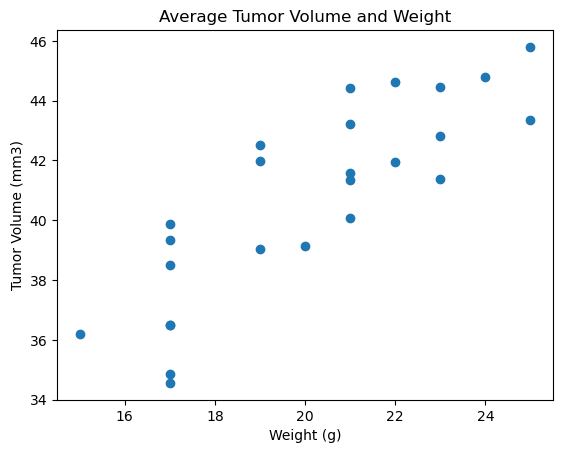

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = study_results_complete.loc[study_results_complete['Drug Regimen'] == 'Capomulin']
cheeses_for_meeces = capomulin.groupby('Mouse ID')
mouse_weight = cheeses_for_meeces['Weight (g)'].mean()
mouse_tumors = cheeses_for_meeces['Tumor Volume (mm3)'].mean()
avg_weight_tumor_vol = pd.DataFrame({
    'Weight (g)': mouse_weight,
    'Tumor Volume (mm3)': mouse_tumors})
x = avg_weight_tumor_vol['Weight (g)']
y = avg_weight_tumor_vol['Tumor Volume (mm3)']

plt.scatter(x, y)
plt.title('Average Tumor Volume and Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')


Correlation and Regression

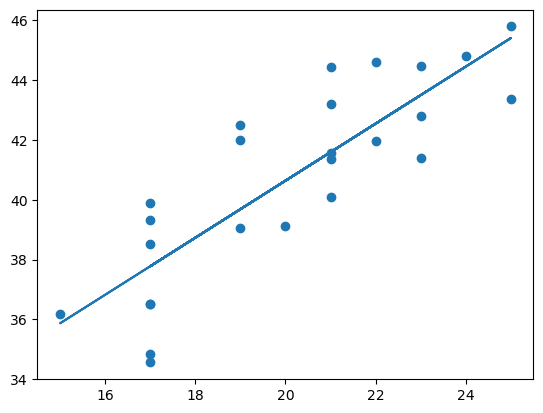

In [17]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy import stats
capomulin = study_results_complete.loc[study_results_complete['Drug Regimen'] == 'Capomulin']
cheeses_for_meeces = capomulin.groupby('Mouse ID')
mouse_weight = cheeses_for_meeces['Weight (g)'].mean()
mouse_tumors = cheeses_for_meeces['Tumor Volume (mm3)'].mean()
avg_weight_tumor_vol = pd.DataFrame({
    'Weight (g)': mouse_weight,
    'Tumor Volume (mm3)': mouse_tumors})
x = mouse_weight
y = mouse_tumors

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show() 
